- Sayama Exercise 16.2. Revise the code above so that you can measure how many
steps it will take until the system reaches a consensus (i.e., homogenized state). Then
run multiple simulations (Monte Carlo simulations) to calculate the average time length
needed for consensus formation in the original voter model.
- Sayama Exercise 16.3. Revise the code further to implement (1) the reversed and (2)
the edge-based voter models. Then conduct Monte Carlo simulations to measure the
average time length needed for consensus formation in each case. Compare the results
between the three versions.


Generate histograms of results for the three models above and compute the average time until
consensus for each model. Be sure to explicitly comment on and compare the results from the
three models.

In [14]:
import matplotlib 
from matplotlib import pyplot as plt 
import numpy as np
from pylab import *
import networkx as nx
import random as rd

seed = 2

class Voter:
    def __init__(self):
        self.g = nx.karate_club_graph()
        self.g.pos = nx.spring_layout(self.g)
        for i in self.g.nodes:
            self.g.nodes[i]['state'] = 1 if random(seed) < .5 else 0

    def observe(self):
        cla()
        nx.draw(self.g, vmin = 0, vmax = 1,
                node_color = [self.g.nodes[i]['state'] for i in self.g.nodes],
                pos = self.g.pos)
        
    def update_edge(self):
        "shuffle and update"
        edge = list(rd.choice(list(self.g.edges)))
        rd.shuffle(edge)
        speaker, listener = edge[0], edge[1]
        self.g.nodes[listener]['state'] = self.g.nodes[speaker]['state']
        
    def update_reverse(self):
        speaker = rd.choice(list(self.g.nodes))
        listener = rd.choice(list(self.g.neighbors(speaker)))
        self.g.nodes[listener]['state'] = self.g.nodes[speaker]['state']
        
    def update_org(self):
        listener = rd.choice(list(self.g.nodes))
        speaker = rd.choice(list(self.g.neighbors(listener)))
        self.g.nodes[listener]['state'] = self.g.nodes[speaker]['state']

def sim(voter):
    states = [voter.g.nodes[i]['state'] for i in range(len(list(voter.g.nodes)))]
    if sum(states) == len(list(voter.g.nodes)) or sum(states) == 0:
        return False
    else: return True
    
def trial(version='org'):
    voter = Voter()
    check = sim(voter)
    step = 0
    if version == "org":
        while check:
            voter.update_org()
            check = sim(voter)
            step += 1
        return step
    elif version == "reverse":
        while check:
            voter.update_reverse()
            check = sim(voter)
            step += 1
        return step
    else:
        while check:
            voter.update_edge()
            check = sim(voter)
            step += 1
        return step       
    
        
def MonteCarlo(trials, version = "org"):
    step_ls = []
    for i in range(trials):
        step_ls.append(trial(version))
    return step_ls

In [15]:
nT = 800
step_org = MonteCarlo(nT, "org")
step_reverse = MonteCarlo(nT, "reverse")
step_edge = MonteCarlo(nT, "edge")

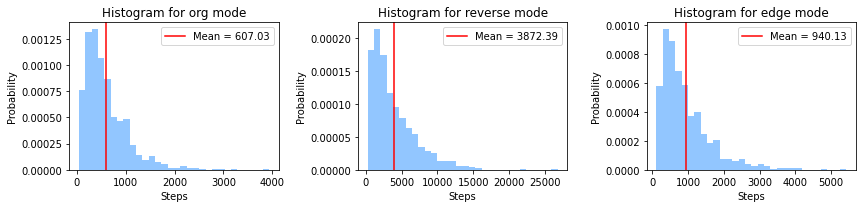

In [27]:
fig, ax = plt.subplots(1,3, figsize=(12,3))
plt.style.use('seaborn-pastel')
names = ["org","reverse","edge"]
hist = [step_org, step_reverse, step_edge]

for i in range(len(names)):
    ax[i].hist(hist[i], bins = 30, density = True )
    ax[i].axvline(sum(hist[i])/len(hist[i]), color = "red", label = f"Mean = {sum(hist[i])/len(hist[i]):.2f}")
    ax[i].set_xlabel("Steps")
    ax[i].set_ylabel("Probability")
    ax[i].legend()
    ax[i].set_title(f"Histogram for {names[i]} mode")
fig.tight_layout()



### Takeaways: 
1. The simulation shows for `org`, `reverse` and `edge` mode, the average number of steps varies, while the shape of distribution looks similar. 
  - For the original model (org), the avg step is 600 because we tend to select well-connected speakers, thus in terms of opinion spread, this model work very effectively.
  - For the edge model, the avg step is 1050. An interpretation for this is that we're choosing the edge as oppose to node, so compare to original model it's more likely to choose relatively less connected nodes. (One edge connects to two nodes with one node being less connected). 
  - For the reverse model, since its equal chance to pick any node, we are even more likely to pick less-connected nodes, slowing down the numbers of steps for the vote to spread arcoss the network.  